In [1]:
import os
import sys

os.getcwd()
# Change the current working directory to one dir above
# os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()


'c:\\Users\\giorg\\OneDrive\\Έγγραφα\\Σχολή\\Πτυχιακή\\ADBOD'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from numpy import ndarray as NDArray
import pandas as pd
import random
from Techniques import dynamic
import time
from tqdm import tqdm
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score, recall_score, precision_score
from prts import ts_recall, ts_precision
# from TSB_UAD_code.feature import Window

from Techniques.dynamic import dynamic_kr
# from TSB_UAD_code.slidingWindows import find_length
# from sklearn.preprocessing import MinMaxScaler

import tsfel
import variables
import seaborn as sns
from my_experiment import Experiment


In [3]:
z = np.arange(4, 20) / 2
k = np.array([5,6,7,8,9,10,13,17,21,30,40])

df = pd.DataFrame()
# Add 5 columns to the dataframe --> dataset, time, recall, precision, f1
df['dataset'] = ''
df['time'] = ''
df['recall'] = ''
df['precision'] = ''
df['f1'] = ''

# Test the Yahoo dataset with the selected z values
for dataset in variables.datasets:
    times_original, recalls_original, precisions_original, f1s_original = Experiment.test_dataset(dataset_root_name=dataset, mode='z', slide=100 , window=200, z=z)

    for i in range(len(times_original)):
        df = pd.concat([df, pd.DataFrame({'dataset': [f'{dataset}'], 'time': [times_original[i]], 'recall': [recalls_original[i]], 'precision': [precisions_original[i]], 'f1': [f1s_original[i]]})], ignore_index=True)




100%|██████████| 100/100 [00:12<00:00,  7.98it/s]


In [4]:
df.head(-1)

,dataset,time,recall,precision,f1
0,./data/YAHOO/Yahoo_A1real_,0.128770,0.500000,0.100000,0.166667
1,./data/YAHOO/Yahoo_A1real_,0.095780,0.062500,0.052632,0.057143
2,./data/YAHOO/Yahoo_A1real_,0.094678,0.133333,0.181818,0.153846
3,./data/YAHOO/Yahoo_A1real_,0.147375,0.600000,0.230769,0.333333
4,./data/YAHOO/Yahoo_A1real_,0.128653,0.500000,0.100000,0.166667
...,...,...,...,...,...
358,./data/YAHOO/YahooA4Benchmark-TS,0.108909,0.307692,0.222222,0.258065
359,./data/YAHOO/YahooA4Benchmark-TS,0.106700,0.200000,0.071429,0.105263
360,./data/YAHOO/YahooA4Benchmark-TS,0.114738,0.500000,0.071429,0.125000
361,./data/YAHOO/YahooA4Benchmark-TS,0.123576,0.375000,0.428571,0.400000


In [5]:
# Get the mean time and f1 score for each dataset
df = pd.read_csv(f'original_results_{100}_{200}.csv')
print(df.groupby('dataset')['f1'].mean())

dataset
./data/YAHOO/YahooA3Benchmark-TS    0.370367
./data/YAHOO/YahooA4Benchmark-TS    0.314030
./data/YAHOO/Yahoo_A1real_          0.183979
./data/YAHOO/Yahoo_A2synthetic_     0.352369
Name: f1, dtype: float64


In [8]:
# Save the results to a csv file
df.to_csv('original_results.csv', index=False)

In [ ]:
# z1 = list(d / 2 for d in range(4, 20))
z2 = list(d / 2 for d in range(4, 12))
# k1 = [5,6,7,8,9,10,13,17,21,30,40]
k2 = [5,8, 13, 21, 30]

df = pd.read_csv('original_results.csv')
speedups = []
f1s = []
# Test the Yahoo dataset with the selected z values
for dataset in variables.datasets:
    for i in range(5):
        times_original, _, _, f1s_original = Experiment.test_dataset(dataset_root_name=dataset, mode='z', slide=100, window=200, z=z1)
    times_half, _, _, f1s_half = Experiment.test_dataset(dataset_root_name=dataset, mode='z', slide=100, window=200, z=z2)

    # Calculate speedup
    speedup = np.sum(times_original) / np.sum(times_half)
    # Mean f1 score
    speedups.append(speedup)
    f1s.append(np.mean(f1s_half))

    print(f'Dataset: {dataset}, Original F1: {np.mean(f1s_original)}, Half F1: {np.mean(f1s_half)}, Speedup: {speedup}')



100%|██████████| 100/100 [00:06<00:00, 15.92it/s]


Dataset: ./data/YAHOO/Yahoo_A1real_, Original F1: 0.1815451391168642, Half F1: 0.19296676945815883, Speedup: 1.3371071134832144


100%|██████████| 100/100 [00:08<00:00, 12.25it/s]


Dataset: ./data/YAHOO/Yahoo_A2synthetic_, Original F1: 0.35966572173122063, Half F1: 0.3223598087058345, Speedup: 1.2477456251788377


100%|██████████| 100/100 [00:10<00:00,  9.27it/s]


Dataset: ./data/YAHOO/YahooA3Benchmark-TS, Original F1: 0.36747245545181595, Half F1: 0.360629519189596, Speedup: 1.2054897627821104


100%|██████████| 100/100 [00:10<00:00,  9.73it/s]

Dataset: ./data/YAHOO/YahooA4Benchmark-TS, Original F1: 0.31329769587276046, Half F1: 0.2958599042921132, Speedup: 1.1984343908121413


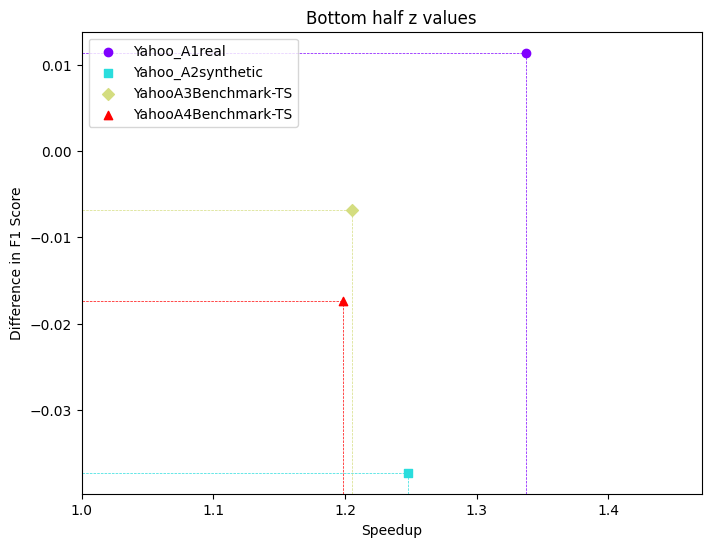

In [21]:
f1_diff = [f1 - true_f1 for f1, true_f1 in zip(f1s, true_f1s)]

plt.figure(figsize=(8, 6))
plt.xlabel('Speedup')
plt.ylabel('Difference in F1 Score')

plt.xlim(1, max(speedups) * 1.1)

markers = ['o', 's', 'D', '^', 'v', '*', 'p', 'X', '<', '>']
colors = plt.cm.rainbow(np.linspace(0, 1, len(variables.dataset_names)))

# Plot scatter points
for i, dataset in enumerate(variables.dataset_names):
    plt.scatter(speedups[i], f1_diff[i], color=colors[i], label=dataset, marker=markers[i % len(markers)])

# Fetch updated y-limits after scatter plot
y_min, y_max = plt.ylim()

# Add vertical and horizontal dashed lines
for i, dataset in enumerate(variables.dataset_names):
    plt.axhline(y=f1_diff[i], color=colors[i], linestyle='--', linewidth=0.5, 
                xmax=(speedups[i] - 1) / (plt.xlim()[1] - 1))
    plt.axvline(x=speedups[i], color=colors[i], linestyle='--', linewidth=0.5, 
                ymax=(f1_diff[i] - y_min) / (y_max - y_min))

plt.legend()
plt.title('Bottom half z values')
plt.show()

In [1]:
import pyarrow.csv as pc
import pyarrow as pa

In [10]:
table = pc.read_csv('./data/YAHOO/Yahoo_A1real_3_data.out')
arrays = [col.to_numpy() for col in table.columns]
arrays

[array([ 3.48138889,  3.38027778,  3.19333333, ..., 17.30472222,
        18.85305556, 14.93888889]),
 array([0., 0., 0., ..., 1., 1., 1.])]

In [3]:
table

pyarrow.Table
0.091757964510557: double
0.0: double
----
0.091757964510557: [[0.1722967523844999,0.22621935431999,0.17635798469946,0.0904912454760509,0.08460994072769,...,0.1596748250523599,0.1376261305013,0.19744146988036,0.16196617698953,0.11164835204555]]
0.0: [[0,0,0,0,0,...,0,0,0,0,0]]

In [52]:
z = np.arange(4, 20) / 2
k = np.array([5,6,7,8,9,10,13,17,21,30,40])
k2 = np.array(k[:int(len(k)*0.25)])

z1 = np.arange(4,8)
k1 = np.array([6,7,8])


speedups, f1s = Experiment.test_all_datasets(mode='opt', slide=100, window=200, z=z1, k=k1)

100%|██████████| 100/100 [00:00<00:00, 115.65it/s]


<Axes: xlabel='species', ylabel='sepal_length'>

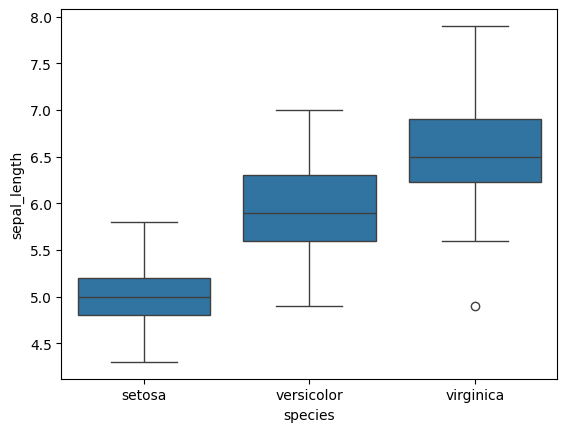

In [43]:
dataset = sns.load_dataset('iris')
sns.boxplot(x='species', y='sepal_length', data=dataset)

0.01080626669265851
0.021541608043366453
-0.0035474316191479237
-0.013186787758384009


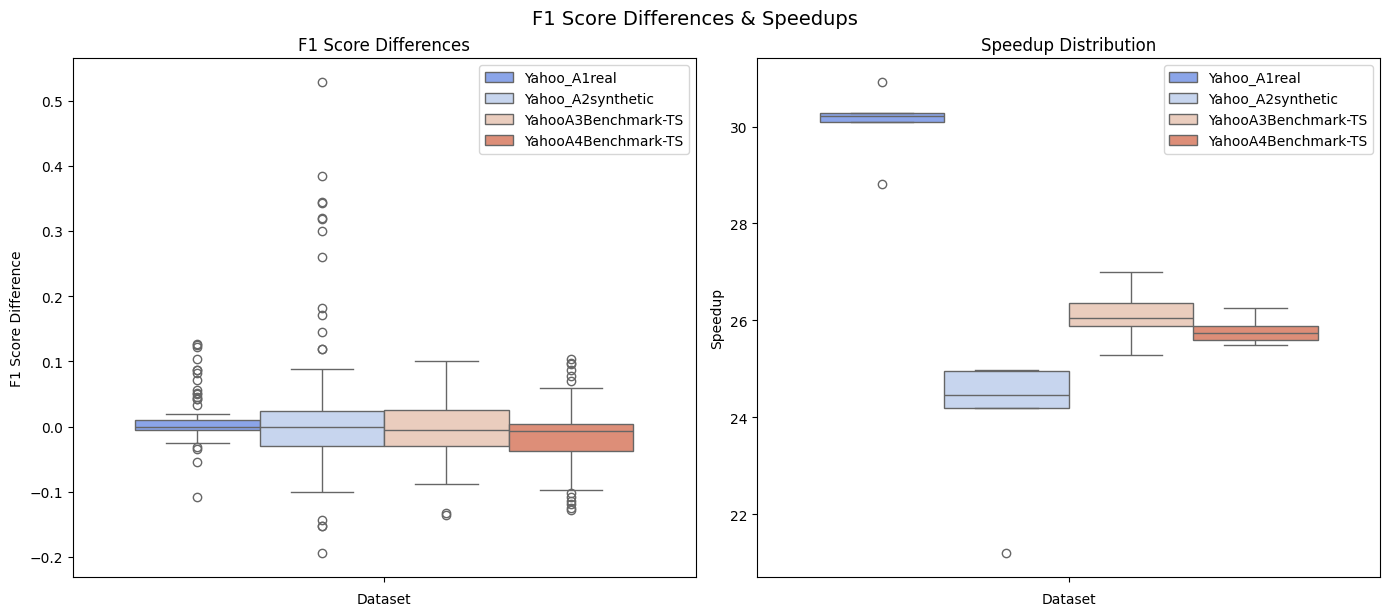

In [60]:
import seaborn as sns
title = 'F1 Score Differences & Speedups'
# Get the original mean f1 scores in the same order as the datasets (ίδια σειρά με τα f1s που έρχονται ως όρισμα)
df = pd.read_csv('original_results.csv')
original_f1s = []
for dataset in variables.datasets:
    original_f1s.append(df.groupby('dataset').get_group(dataset)['f1'])
    # print(len(original_f1s[-1]))

# Compute F1 score differences
f1_diffs = []
f1_labels = []
for i, dataset in enumerate(variables.dataset_names):
    diffs = list(np.array(f1s[i]) - np.array(original_f1s[i]))  # Ensure element-wise 
    print(np.array(diffs).mean())
    f1_diffs.extend(diffs)  # Flatten
    f1_labels.extend([dataset] * len(diffs))  # Repeat dataset label

# Flatten speedups similarly
speedup_data = []
speedup_labels = []
for i, dataset in enumerate(variables.dataset_names):
    speedup_data.extend(speedups[i])
    speedup_labels.extend([dataset] * len(speedups[i]))  # Repeat dataset label


fig, axes = plt.subplots(1, 2, figsize=(14, 6))



### --- First Subplot: F1 Score Differences ---
axes[0].set_title("F1 Score Differences")
axes[0].set_xlabel("Dataset")
axes[0].set_ylabel("F1 Score Difference")
sns.boxplot(hue=f1_labels, y=f1_diffs, ax=axes[0], palette="coolwarm")


### --- Second Subplot: Speedup Boxplots ---
axes[1].set_title("Speedup Distribution")
axes[1].set_xlabel("Dataset")
axes[1].set_ylabel("Speedup")
sns.boxplot(hue=speedup_labels, y=speedup_data, ax=axes[1], palette="coolwarm")


plt.tight_layout()
fig.suptitle(title if title else "F1 Score Differences & Speedups", fontsize=14, y=1.02)
plt.show()